In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from pycaret.classification import *
import shap

/Users/paula/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Loading data

In [2]:
customer_data= pd.read_csv('term-deposit-marketing-2020.csv')
customer_data.shape

(40000, 14)

In [3]:
customer_data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [4]:
customer_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
customer_data.y.value_counts()

no     37104
yes     2896
Name: y, dtype: int64

## Data inspection & preprocessing

Text(0.5, 1.0, 'Boxplot of Age feature')

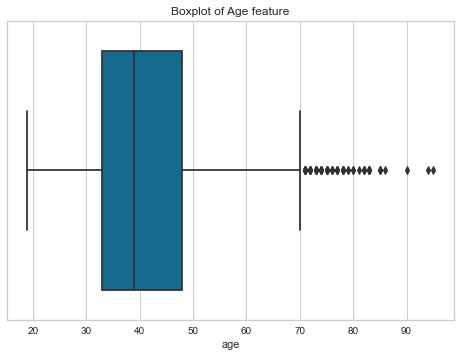

In [7]:
# Review outliers on age
sns.boxplot(customer_data['age'])
plt.title('Boxplot of Age feature')

Text(0.5, 1.0, 'Boxplot of Balance feature')

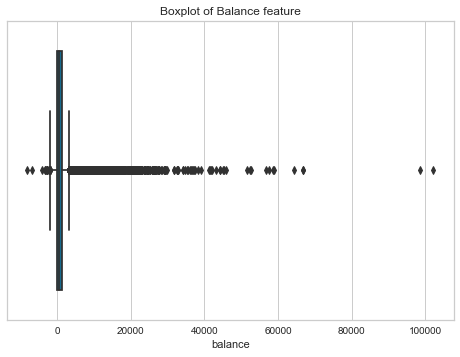

In [8]:
# Review outliers on balance
sns.boxplot(customer_data['balance'])
plt.title('Boxplot of Balance feature')

Text(0.5, 1.0, 'Boxplot of Day feature')

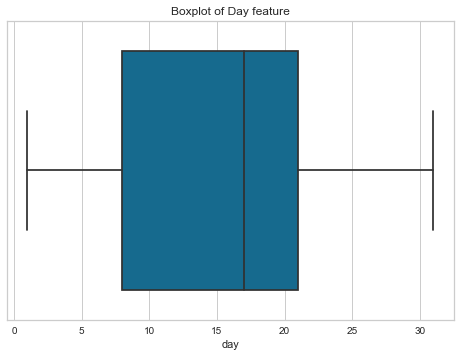

In [9]:
# Review outliers on day
sns.boxplot(customer_data['day'])
plt.title('Boxplot of Day feature')

Text(0.5, 1.0, 'Boxplot of Duration feature')

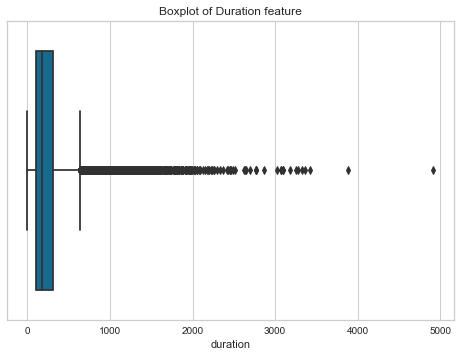

In [10]:
# Review outliers on duration
sns.boxplot(customer_data['duration'])
plt.title('Boxplot of Duration feature')

Text(0.5, 1.0, 'Boxplot of Campaign feature')

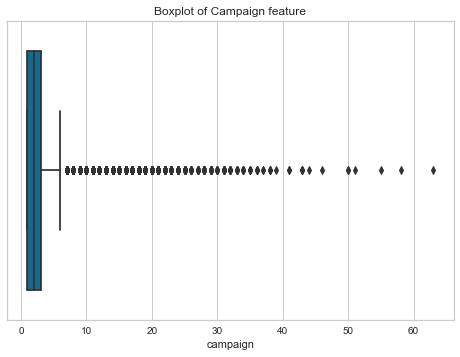

In [11]:
# Review outliers on duration
sns.boxplot(customer_data['campaign'])
plt.title('Boxplot of Campaign feature')

In [14]:
#Inspect correlations
customer_data.corr()

,age,balance,day,duration,campaign
age,1.000000,0.081517,-0.011689,-0.036270,0.016204
balance,0.081517,1.000000,0.011662,0.014072,-0.008137
day,-0.011689,0.011662,1.000000,-0.032983,0.165429
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000


In [13]:
# Separate numerical variables
numerical_cols = ['age','duration','balance','campaign','day']

In [15]:
numerical_df = customer_data[numerical_cols]

In [16]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_df_transf = pd.DataFrame(scaler.fit_transform(numerical_df),columns=numerical_df.columns)
numerical_df_transf

,age,duration,balance,campaign,day
0,1.810415,0.023811,0.299174,-0.581096,-1.330900
1,0.358382,-0.400305,-0.428854,-0.581096,-1.330900
2,-0.782501,-0.689474,-0.438152,-0.581096,-1.330900
3,0.669532,-0.627785,0.079802,-0.581096,-1.330900
4,-0.782501,-0.219092,-0.438497,-0.581096,-1.330900
...,...,...,...,...,...
39995,1.291832,-0.569951,-0.302809,-0.581096,-1.572504
39996,-1.093650,-0.064868,0.711402,0.036377,-1.572504
39997,1.395549,-0.327048,-0.369964,-0.581096,-1.572504
39998,-0.678784,0.336114,-0.078271,-0.581096,-1.572504


## Model Selection and Training

### Using PyCaret

In [17]:
# sample 5% of data to be used as unseen data
data = customer_data.sample(frac=0.95, random_state=786)
data_unseen = customer_data.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [18]:
# init setup

s = setup(data = data, target = 'y', fold=5, session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(38000, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9394,0.9515,0.4185,0.6068,0.4950,0.4640,0.4732,5.2960
lightgbm,Light Gradient Boosting Machine,0.9387,0.9501,0.4254,0.5965,0.4962,0.4646,0.4723,0.6020
gbc,Gradient Boosting Classifier,0.9381,0.9439,0.3635,0.6081,0.4540,0.4235,0.4398,2.3400
xgboost,Extreme Gradient Boosting,0.9379,0.9471,0.4254,0.5886,0.4934,0.4612,0.4684,3.8880
rf,Random Forest Classifier,0.9363,0.9392,0.2937,0.6096,0.3957,0.3664,0.3942,1.5380
lr,Logistic Regression,0.9356,0.9220,0.2619,0.6076,0.3657,0.3374,0.3711,4.7420
lda,Linear Discriminant Analysis,0.9349,0.9285,0.4423,0.5528,0.4907,0.4565,0.4601,0.2560
ridge,Ridge Classifier,0.9331,0.0000,0.1577,0.6163,0.2506,0.2283,0.2883,0.0740
ada,Ada Boost Classifier,0.9329,0.9300,0.3249,0.5459,0.4071,0.3740,0.3883,0.7480
et,Extra Trees Classifier,0.9328,0.9210,0.2190,0.5752,0.3164,0.2885,0.3265,1.5940


In [75]:
best_model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9378,0.9511,0.4101,0.5894,0.4836,0.4516,0.4601
1,0.9402,0.9533,0.4206,0.6163,0.5000,0.4694,0.4791
2,0.9376,0.9412,0.4550,0.5772,0.5089,0.4761,0.4799
3,0.9395,0.9531,0.4392,0.6014,0.5076,0.4762,0.4829
4,0.9383,0.9516,0.4021,0.5984,0.4810,0.4496,0.4596
Mean,0.9387,0.9501,0.4254,0.5965,0.4962,0.4646,0.4723
Std,0.0010,0.0045,0.0193,0.0130,0.0118,0.0117,0.0103


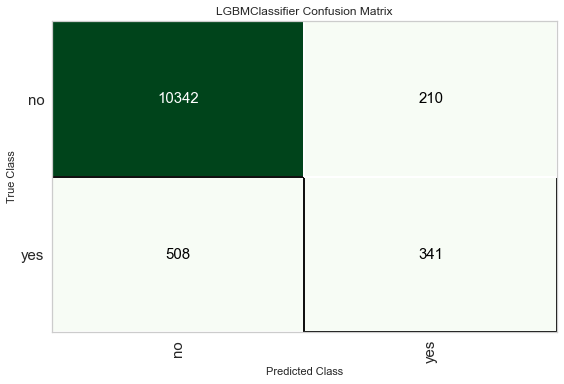

In [76]:
plot_model(best_model, plot = 'confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

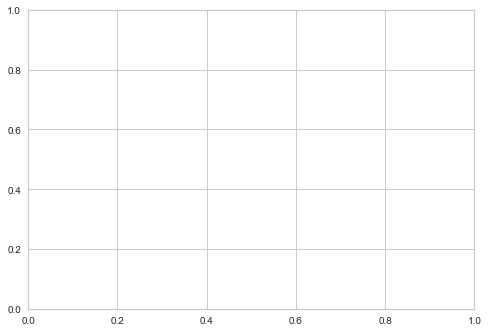

In [22]:
evaluate_model(best_model)

In [77]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9370,0.9479,0.4016,0.6189,0.4871,0.4552,0.4673


,age,balance,day,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,y,Label,Score
0,40.0,376.0,11.0,268.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9988
1,59.0,3353.0,12.0,148.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9992
2,31.0,0.0,29.0,82.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9980
3,39.0,0.0,16.0,41.0,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9997
4,30.0,2030.0,28.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,32.0,12686.0,3.0,54.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9993
11397,50.0,0.0,6.0,327.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.9699
11398,45.0,276.0,9.0,346.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no,no,0.9962
11399,51.0,371.0,4.0,52.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9987


<b> The CatBoost model allows us to predict if a customer will subscribe or not with almost 94% accuracy

## Bonus questions

In [25]:
import shap

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [38]:
y = customer_data['y']
y

0         no
1         no
2         no
3         no
4         no
        ... 
39995     no
39996    yes
39997    yes
39998     no
39999     no
Name: y, Length: 40000, dtype: object

In [39]:
# Parsing target to binary
y = np.where(y=='no',0,1)
y

array([0, 0, 0, ..., 1, 0, 0])

In [43]:
# Checking imbalance remains the same
np.unique(y, return_counts=True)

(array([0, 1]), array([37104,  2896]))

In [44]:
# We already have the numerical df from step 2
numerical_df_transf

,age,duration,balance,campaign,day
0,1.810415,0.023811,0.299174,-0.581096,-1.330900
1,0.358382,-0.400305,-0.428854,-0.581096,-1.330900
2,-0.782501,-0.689474,-0.438152,-0.581096,-1.330900
3,0.669532,-0.627785,0.079802,-0.581096,-1.330900
4,-0.782501,-0.219092,-0.438497,-0.581096,-1.330900
...,...,...,...,...,...
39995,1.291832,-0.569951,-0.302809,-0.581096,-1.572504
39996,-1.093650,-0.064868,0.711402,0.036377,-1.572504
39997,1.395549,-0.327048,-0.369964,-0.581096,-1.572504
39998,-0.678784,0.336114,-0.078271,-0.581096,-1.572504


In [48]:
# Now transform the categorical columns to dummies
categorical_df = customer_data[['job','marital','education','default','housing','loan','contact','month']]
categorical_df = pd.get_dummies(categorical_df,drop_first=True)
categorical_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# Merge the df's
merged_df = pd.concat([numerical_df_transf,categorical_df],axis=1)
merged_df

,age,duration,balance,campaign,day,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,1.810415,0.023811,0.299174,-0.581096,-1.330900,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.358382,-0.400305,-0.428854,-0.581096,-1.330900,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.782501,-0.689474,-0.438152,-0.581096,-1.330900,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.669532,-0.627785,0.079802,-0.581096,-1.330900,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.782501,-0.219092,-0.438497,-0.581096,-1.330900,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,-0.569951,-0.302809,-0.581096,-1.572504,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,-1.093650,-0.064868,0.711402,0.036377,-1.572504,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
39997,1.395549,-0.327048,-0.369964,-0.581096,-1.572504,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,-0.678784,0.336114,-0.078271,-0.581096,-1.572504,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [110]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(merged_df, y, test_size=0.3, random_state=42)

In [111]:
# Over sampling for imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [112]:
# Checking imbalance after SMOTE
np.unique(y_res, return_counts=True)

(array([0, 1]), array([25976, 25976]))

In [113]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model

In [114]:
# Fit catboost
model.fit(X_res,y_res)

Learning rate set to 0.055654
0:	learn: 0.6297599	total: 29.7ms	remaining: 29.7s
1:	learn: 0.5834265	total: 41.2ms	remaining: 20.6s
2:	learn: 0.5371105	total: 53.5ms	remaining: 17.8s
3:	learn: 0.5022211	total: 64.9ms	remaining: 16.2s
4:	learn: 0.4760172	total: 80.6ms	remaining: 16s
5:	learn: 0.4544296	total: 91.7ms	remaining: 15.2s
6:	learn: 0.4293132	total: 103ms	remaining: 14.6s
7:	learn: 0.4144775	total: 118ms	remaining: 14.6s
8:	learn: 0.3983199	total: 129ms	remaining: 14.2s
9:	learn: 0.3845133	total: 140ms	remaining: 13.9s
10:	learn: 0.3719320	total: 152ms	remaining: 13.6s
11:	learn: 0.3634120	total: 163ms	remaining: 13.4s
12:	learn: 0.3554148	total: 177ms	remaining: 13.4s
13:	learn: 0.3458463	total: 194ms	remaining: 13.7s
14:	learn: 0.3380170	total: 208ms	remaining: 13.6s
15:	learn: 0.3309865	total: 219ms	remaining: 13.5s
16:	learn: 0.3254510	total: 231ms	remaining: 13.4s
17:	learn: 0.3211669	total: 243ms	remaining: 13.3s
18:	learn: 0.3165225	total: 255ms	remaining: 13.2s
19:	lea

164:	learn: 0.1496653	total: 2.24s	remaining: 11.3s
165:	learn: 0.1494518	total: 2.26s	remaining: 11.3s
166:	learn: 0.1492805	total: 2.27s	remaining: 11.3s
167:	learn: 0.1480449	total: 2.28s	remaining: 11.3s
168:	learn: 0.1477418	total: 2.29s	remaining: 11.3s
169:	learn: 0.1476022	total: 2.3s	remaining: 11.2s
170:	learn: 0.1470155	total: 2.31s	remaining: 11.2s
171:	learn: 0.1468435	total: 2.32s	remaining: 11.2s
172:	learn: 0.1464717	total: 2.33s	remaining: 11.2s
173:	learn: 0.1460315	total: 2.35s	remaining: 11.1s
174:	learn: 0.1454218	total: 2.36s	remaining: 11.1s
175:	learn: 0.1449316	total: 2.37s	remaining: 11.1s
176:	learn: 0.1447293	total: 2.38s	remaining: 11.1s
177:	learn: 0.1441465	total: 2.39s	remaining: 11.1s
178:	learn: 0.1439628	total: 2.4s	remaining: 11s
179:	learn: 0.1432513	total: 2.41s	remaining: 11s
180:	learn: 0.1431231	total: 2.43s	remaining: 11s
181:	learn: 0.1429072	total: 2.44s	remaining: 11s
182:	learn: 0.1423131	total: 2.46s	remaining: 11s
183:	learn: 0.1421701	to

329:	learn: 0.1090205	total: 4.49s	remaining: 9.12s
330:	learn: 0.1089827	total: 4.5s	remaining: 9.1s
331:	learn: 0.1089032	total: 4.51s	remaining: 9.09s
332:	learn: 0.1088439	total: 4.53s	remaining: 9.07s
333:	learn: 0.1087900	total: 4.54s	remaining: 9.05s
334:	learn: 0.1087310	total: 4.55s	remaining: 9.03s
335:	learn: 0.1084165	total: 4.56s	remaining: 9.01s
336:	learn: 0.1079295	total: 4.57s	remaining: 8.99s
337:	learn: 0.1075179	total: 4.58s	remaining: 8.97s
338:	learn: 0.1073709	total: 4.59s	remaining: 8.95s
339:	learn: 0.1068938	total: 4.6s	remaining: 8.94s
340:	learn: 0.1064071	total: 4.62s	remaining: 8.92s
341:	learn: 0.1061871	total: 4.63s	remaining: 8.9s
342:	learn: 0.1061115	total: 4.64s	remaining: 8.88s
343:	learn: 0.1059191	total: 4.65s	remaining: 8.87s
344:	learn: 0.1057849	total: 4.66s	remaining: 8.85s
345:	learn: 0.1056420	total: 4.67s	remaining: 8.83s
346:	learn: 0.1055635	total: 4.68s	remaining: 8.81s
347:	learn: 0.1055022	total: 4.69s	remaining: 8.8s
348:	learn: 0.105

488:	learn: 0.0901950	total: 6.76s	remaining: 7.07s
489:	learn: 0.0901395	total: 6.84s	remaining: 7.13s
490:	learn: 0.0900452	total: 6.89s	remaining: 7.14s
491:	learn: 0.0900006	total: 6.92s	remaining: 7.15s
492:	learn: 0.0899318	total: 6.94s	remaining: 7.14s
493:	learn: 0.0898481	total: 6.96s	remaining: 7.13s
494:	learn: 0.0897582	total: 6.97s	remaining: 7.11s
495:	learn: 0.0896111	total: 6.99s	remaining: 7.1s
496:	learn: 0.0895680	total: 7s	remaining: 7.09s
497:	learn: 0.0895300	total: 7.02s	remaining: 7.07s
498:	learn: 0.0894182	total: 7.03s	remaining: 7.06s
499:	learn: 0.0893671	total: 7.04s	remaining: 7.04s
500:	learn: 0.0892748	total: 7.06s	remaining: 7.03s
501:	learn: 0.0891365	total: 7.07s	remaining: 7.02s
502:	learn: 0.0890761	total: 7.08s	remaining: 7s
503:	learn: 0.0889135	total: 7.1s	remaining: 6.99s
504:	learn: 0.0886426	total: 7.11s	remaining: 6.97s
505:	learn: 0.0885069	total: 7.13s	remaining: 6.96s
506:	learn: 0.0884580	total: 7.14s	remaining: 6.94s
507:	learn: 0.088364

648:	learn: 0.0770447	total: 11s	remaining: 5.95s
649:	learn: 0.0769795	total: 11s	remaining: 5.94s
650:	learn: 0.0769203	total: 11.1s	remaining: 5.97s
651:	learn: 0.0768756	total: 11.2s	remaining: 6s
652:	learn: 0.0768082	total: 11.4s	remaining: 6.04s
653:	learn: 0.0767228	total: 11.4s	remaining: 6.05s
654:	learn: 0.0766514	total: 11.5s	remaining: 6.05s
655:	learn: 0.0765923	total: 11.6s	remaining: 6.11s
656:	learn: 0.0765390	total: 11.7s	remaining: 6.1s
657:	learn: 0.0765191	total: 11.8s	remaining: 6.12s
658:	learn: 0.0764821	total: 11.8s	remaining: 6.11s
659:	learn: 0.0764114	total: 11.9s	remaining: 6.11s
660:	learn: 0.0763697	total: 11.9s	remaining: 6.12s
661:	learn: 0.0763340	total: 12s	remaining: 6.12s
662:	learn: 0.0762820	total: 12s	remaining: 6.12s
663:	learn: 0.0762133	total: 12.1s	remaining: 6.11s
664:	learn: 0.0761515	total: 12.1s	remaining: 6.12s
665:	learn: 0.0761218	total: 12.2s	remaining: 6.13s
666:	learn: 0.0760685	total: 12.4s	remaining: 6.18s
667:	learn: 0.0760079	to

811:	learn: 0.0693277	total: 16.4s	remaining: 3.8s
812:	learn: 0.0692863	total: 16.4s	remaining: 3.78s
813:	learn: 0.0692101	total: 16.5s	remaining: 3.76s
814:	learn: 0.0691104	total: 16.5s	remaining: 3.74s
815:	learn: 0.0690570	total: 16.5s	remaining: 3.72s
816:	learn: 0.0690098	total: 16.5s	remaining: 3.7s
817:	learn: 0.0689832	total: 16.6s	remaining: 3.68s
818:	learn: 0.0689673	total: 16.6s	remaining: 3.66s
819:	learn: 0.0689291	total: 16.6s	remaining: 3.64s
820:	learn: 0.0689104	total: 16.6s	remaining: 3.63s
821:	learn: 0.0688924	total: 16.6s	remaining: 3.6s
822:	learn: 0.0688633	total: 16.7s	remaining: 3.58s
823:	learn: 0.0688474	total: 16.7s	remaining: 3.56s
824:	learn: 0.0686388	total: 16.7s	remaining: 3.54s
825:	learn: 0.0685535	total: 16.7s	remaining: 3.52s
826:	learn: 0.0685348	total: 16.7s	remaining: 3.5s
827:	learn: 0.0684915	total: 16.8s	remaining: 3.49s
828:	learn: 0.0684286	total: 16.8s	remaining: 3.47s
829:	learn: 0.0683752	total: 16.9s	remaining: 3.46s
830:	learn: 0.06

978:	learn: 0.0624419	total: 18.9s	remaining: 405ms
979:	learn: 0.0624218	total: 18.9s	remaining: 386ms
980:	learn: 0.0624140	total: 18.9s	remaining: 366ms
981:	learn: 0.0624030	total: 18.9s	remaining: 347ms
982:	learn: 0.0623560	total: 18.9s	remaining: 328ms
983:	learn: 0.0623322	total: 18.9s	remaining: 308ms
984:	learn: 0.0623040	total: 19s	remaining: 289ms
985:	learn: 0.0622574	total: 19s	remaining: 269ms
986:	learn: 0.0622102	total: 19s	remaining: 250ms
987:	learn: 0.0621809	total: 19s	remaining: 231ms
988:	learn: 0.0621506	total: 19s	remaining: 211ms
989:	learn: 0.0621301	total: 19s	remaining: 192ms
990:	learn: 0.0620931	total: 19s	remaining: 173ms
991:	learn: 0.0620755	total: 19.1s	remaining: 154ms
992:	learn: 0.0620237	total: 19.1s	remaining: 134ms
993:	learn: 0.0619966	total: 19.1s	remaining: 115ms
994:	learn: 0.0619474	total: 19.1s	remaining: 96.1ms
995:	learn: 0.0619368	total: 19.1s	remaining: 76.9ms
996:	learn: 0.0619092	total: 19.2s	remaining: 57.6ms
997:	learn: 0.0618867	t

In [115]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
shap_values


Permutation explainer:   3%|▎         | 322/12000 [00:28<15:41, 12.40it/s]


Permutation explainer:   4%|▍         | 526/12000 [00:45<14:59, 12.75it/s]


Permutation explainer:   6%|▌         | 715/12000 [01:02<23:50,  7.89it/s]


Permutation explainer:   7%|▋         | 887/12000 [01:20<23:27,  7.90it/s]


Permutation explainer:   8%|▊         | 998/12000 [01:48<51:43,  3.55it/s]


Permutation explainer:   9%|▉         | 1101/12000 [02:11<36:46,  4.94it/s]


Permutation explainer:  10%|█         | 1204/12000 [02:38<41:16,  4.36it/s]


Permutation explainer:  11%|█         | 1325/12000 [03:01<21:00,  8.47it/s]


Permutation explainer:  12%|█▏        | 1461/12000 [03:17<21:57,  8.00it/s]


Permutation explainer:  13%|█▎        | 1565/12000 [03:33<21:15,  8.18it/s]


Permutation explainer:  14%|█▍        | 1673/12000 [03:47<26:44,  6.44it/s]


Permutation explainer:  15%|█▍        | 1789/12000 [04:03<22:24,  7.59it/s]


Permutation explainer:  16%|█▌        | 1941/12000 [04:22<35:50,  4.68it/s]


Permutation explainer:  18%|█▊        | 2143/12000 [04:40<13:08, 12.50it/s]


Permutation explainer:  20%|█▉        | 2349/12000 [04:57<12:31, 12.84it/s]


Permutation explainer:  21%|██        | 2541/12000 [05:15<12:34, 12.54it/s]


Permutation explainer:  22%|██▏       | 2674/12000 [05:31<20:04,  7.74it/s]


Permutation explainer:  24%|██▎       | 2835/12000 [05:48<24:29,  6.24it/s]


Permutation explainer:  25%|██▌       | 3015/12000 [06:05<14:29, 10.33it/s]


Permutation explainer:  27%|██▋       | 3210/12000 [06:24<13:29, 10.86it/s]


Permutation explainer:  28%|██▊       | 3372/12000 [06:41<14:08, 10.16it/s]


Permutation explainer:  29%|██▉       | 3493/12000 [06:58<20:49,  6.81it/s]


Permutation explainer:  30%|███       | 3636/12000 [07:14<14:59,  9.30it/s]


Permutation explainer:  32%|███▏      | 3840/12000 [07:32<11:40, 11.65it/s]


Permutation explainer:  34%|███▎      | 4034/12000 [07:50<11:32, 11.51it/s]


Permutation explainer:  35%|███▌      | 4240/12000 [08:08<11:37, 11.13it/s]


Permutation explainer:  37%|███▋      | 4434/12000 [08:25<11:10, 11.28it/s]


Permutation explainer:  39%|███▊      | 4623/12000 [08:43<18:14,  6.74it/s]


Permutation explainer:  39%|███▉      | 4735/12000 [08:59<12:38,  9.58it/s]


Permutation explainer:  40%|████      | 4850/12000 [09:17<35:12,  3.39it/s]


Permutation explainer:  41%|████▏     | 4961/12000 [09:36<20:32,  5.71it/s]


Permutation explainer:  42%|████▏     | 5064/12000 [09:51<26:03,  4.44it/s]


Permutation explainer:  43%|████▎     | 5167/12000 [10:13<15:39,  7.27it/s]


Permutation explainer:  44%|████▍     | 5319/12000 [10:31<10:25, 10.68it/s]


Permutation explainer:  45%|████▌     | 5451/12000 [10:49<15:56,  6.85it/s]


Permutation explainer:  47%|████▋     | 5646/12000 [11:07<09:55, 10.68it/s]


Permutation explainer:  48%|████▊     | 5817/12000 [11:24<15:48,  6.52it/s]


Permutation explainer:  50%|████▉     | 5999/12000 [11:41<08:46, 11.40it/s]


Permutation explainer:  52%|█████▏    | 6189/12000 [11:59<21:48,  4.44it/s]


Permutation explainer:  53%|█████▎    | 6314/12000 [12:17<10:33,  8.98it/s]


Permutation explainer:  54%|█████▍    | 6493/12000 [12:36<08:20, 11.01it/s]


Permutation explainer:  56%|█████▌    | 6699/12000 [12:54<07:57, 11.10it/s]


Permutation explainer:  58%|█████▊    | 6905/12000 [13:12<07:13, 11.74it/s]


Permutation explainer:  59%|█████▉    | 7111/12000 [13:30<07:13, 11.27it/s]


Permutation explainer:  61%|██████    | 7311/12000 [13:48<10:20,  7.56it/s]


Permutation explainer:  63%|██████▎   | 7508/12000 [14:06<06:37, 11.29it/s]


Permutation explainer:  64%|██████▍   | 7714/12000 [14:24<06:32, 10.93it/s]


Permutation explainer:  66%|██████▌   | 7900/12000 [14:43<08:29,  8.05it/s]


Permutation explainer:  67%|██████▋   | 8066/12000 [15:00<07:01,  9.33it/s]


Permutation explainer:  69%|██████▉   | 8271/12000 [15:18<05:31, 11.26it/s]


Permutation explainer:  71%|███████   | 8465/12000 [15:36<08:41,  6.77it/s]


Permutation explainer:  72%|███████▏  | 8598/12000 [15:53<05:28, 10.36it/s]


Permutation explainer:  73%|███████▎  | 8776/12000 [16:10<04:47, 11.21it/s]


Permutation explainer:  75%|███████▍  | 8973/12000 [16:27<04:31, 11.16it/s]


Permutation explainer:  76%|███████▋  | 9175/12000 [16:44<03:52, 12.13it/s]


Permutation explainer:  78%|███████▊  | 9320/12000 [17:02<07:37,  5.86it/s]


Permutation explainer:  79%|███████▉  | 9458/12000 [17:21<05:27,  7.76it/s]


Permutation explainer:  80%|████████  | 9650/12000 [17:38<03:09, 12.41it/s]


Permutation explainer:  81%|████████▏ | 9776/12000 [17:56<04:18,  8.62it/s]


Permutation explainer:  83%|████████▎ | 9928/12000 [18:12<02:51, 12.07it/s]


Permutation explainer:  84%|████████▍ | 10132/12000 [18:29<02:49, 11.00it/s]


Permutation explainer:  86%|████████▌ | 10325/12000 [18:45<02:39, 10.48it/s]


Permutation explainer:  87%|████████▋ | 10496/12000 [19:05<03:12,  7.83it/s]


Permutation explainer:  89%|████████▊ | 10635/12000 [19:23<02:53,  7.87it/s]


Permutation explainer:  90%|████████▉ | 10774/12000 [19:40<04:28,  4.57it/s]


Permutation explainer:  91%|█████████▏| 10950/12000 [19:57<02:18,  7.60it/s]


Permutation explainer:  92%|█████████▏| 11083/12000 [20:14<01:18, 11.70it/s]


Permutation explainer:  94%|█████████▍| 11281/12000 [20:31<01:10, 10.19it/s]


Permutation explainer:  96%|█████████▌| 11475/12000 [20:49<00:41, 12.72it/s]


Permutation explainer:  97%|█████████▋| 11679/12000 [21:07<00:28, 11.38it/s]


Permutation explainer:  99%|█████████▉| 11868/12000 [21:25<00:25,  5.25it/s]


Permutation explainer: 100%|█████████▉| 11993/12000 [21:42<00:00,  7.28it/s]


Permutation explainer: 100%|██████████| 12000/12000 [21:43<00:00,  8.80it/s]
Permutation explainer: 12001it [21:43,  9.11it/s]                           


.values =
array([[-0.0075  , -0.065625,  0.0025  , ...,  0.00125 ,  0.014375,
         0.      ],
       [-0.005625, -0.045625,  0.010625, ...,  0.025   ,  0.020625,
         0.      ],
       [-0.008125,  0.021875, -0.0025  , ...,  0.026875,  0.021875,
         0.      ],
       ...,
       [-0.015625, -0.054375,  0.005   , ..., -0.01875 ,  0.003125,
         0.      ],
       [-0.00125 , -0.033125, -0.029375, ..., -0.019375,  0.00125 ,
         0.      ],
       [ 0.005   , -0.054375, -0.01125 , ..., -0.019375,  0.000625,
         0.      ]])

.base_values =
array([0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08])

.data =
array([[ 0.77324899, -0.21909156, -0.34723489, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.29183216,  0.31298073, -0.40991282, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25466582,  0.46720458,  0.79336568, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.46209909, -0.28463669, -0.28111312, ...,  1.        

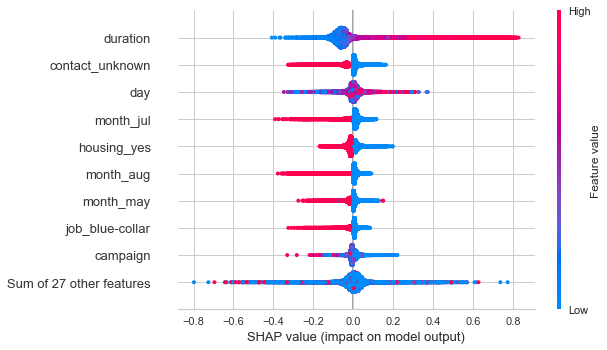

In [118]:
# Swarm plot

shap.plots.beeswarm(shap_values)


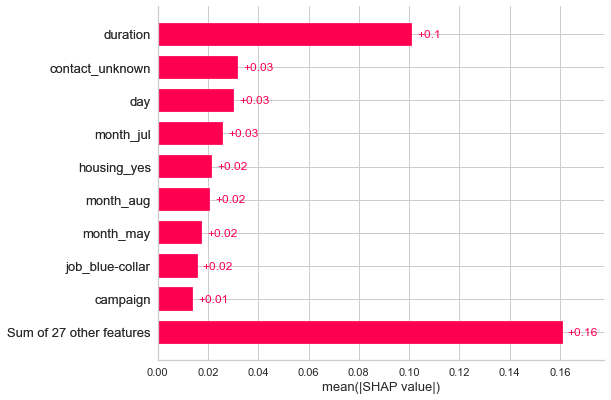

In [121]:
# Feature importance
shap.plots.bar(shap_values)

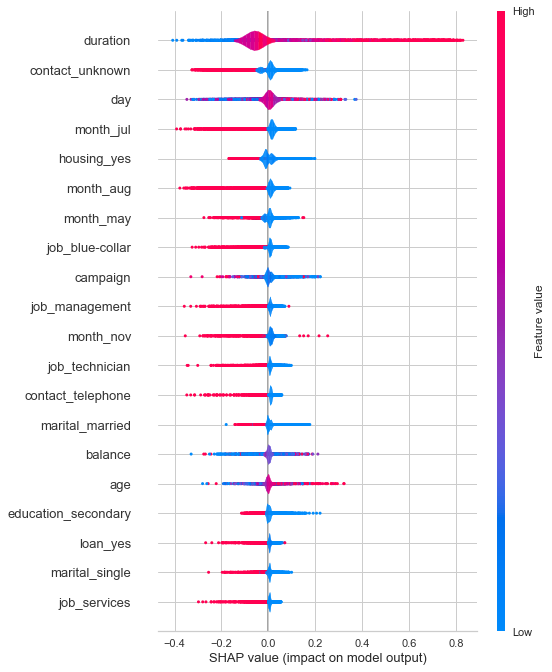

In [122]:
# Violin plot
shap.summary_plot(shap_values, plot_type='violin')

### We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

<b> Looking at shap values, 

### What makes the customers buy? Tell us which feature we should be focusing more on

<b> By looking at the <em>swarmplot<em>, the most important features are*: Duration (+), if the contact is unknown (-), day (+), of the month is july, august and may (-), if the person has housing (-), and campaign (-). Features are enumerated in order of importance on the outcome.

    
    
<em>* Meaning of signs in parenthesis are if high values of the feature impact positively or negatively to the output of the model